In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import warnings

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset
pre_x =pd.read_csv('/content/drive/MyDrive/MushroomDataset/secondary_data.csv', delimiter=';', low_memory=False)
pre_x.shape

(61069, 21)

In [ ]:
pre_x.head(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
print(f"number of Headings: {len(pre_x.columns)}")
for inx,dat in enumerate(pre_x.columns): print (inx,dat)

number of Headings: 21
0 class
1 cap-diameter
2 cap-shape
3 cap-surface
4 cap-color
5 does-bruise-or-bleed
6 gill-attachment
7 gill-spacing
8 gill-color
9 stem-height
10 stem-width
11 stem-root
12 stem-surface
13 stem-color
14 veil-type
15 veil-color
16 has-ring
17 ring-type
18 spore-print-color
19 habitat
20 season


Variable Information:
   (n: nominal, m: metrical; nominal values as sets of values)
   0. class		poisonous=p, edibile=e (binary)
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f,sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t,wrinkled=w, fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e,rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w


In [ ]:
pre_x = pre_x.drop(pre_x.columns[[5,7,11,12,14,15,18,19]], axis=1)

In [ ]:
pre_x.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,season
0,p,15.26,x,g,o,e,w,16.95,17.09,w,t,g,w
1,p,16.60,x,g,o,e,w,17.99,18.19,w,t,g,u
2,p,14.07,x,g,o,e,w,17.80,17.74,w,t,g,w
3,p,14.17,f,h,e,e,w,15.77,15.98,w,t,p,w
4,p,14.64,x,h,o,e,w,16.53,17.20,w,t,p,w


In [ ]:
pre_x.shape

(61069, 13)

In [ ]:
pre_x.isnull().sum()

class                  0
cap-diameter           0
cap-shape              0
cap-surface        14120
cap-color              0
gill-attachment     9884
gill-color             0
stem-height            0
stem-width             0
stem-color             0
has-ring               0
ring-type           2471
season                 0
dtype: int64

In [ ]:
pre_x= pre_x.dropna()
print(f"{pre_x.shape,pre_x.isnull().sum()}")

((37065, 13), class              0
cap-diameter       0
cap-shape          0
cap-surface        0
cap-color          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
has-ring           0
ring-type          0
season             0
dtype: int64)


In [ ]:
print(f"{pre_x['class'].value_counts()}")

class
p    20121
e    16944
Name: count, dtype: int64


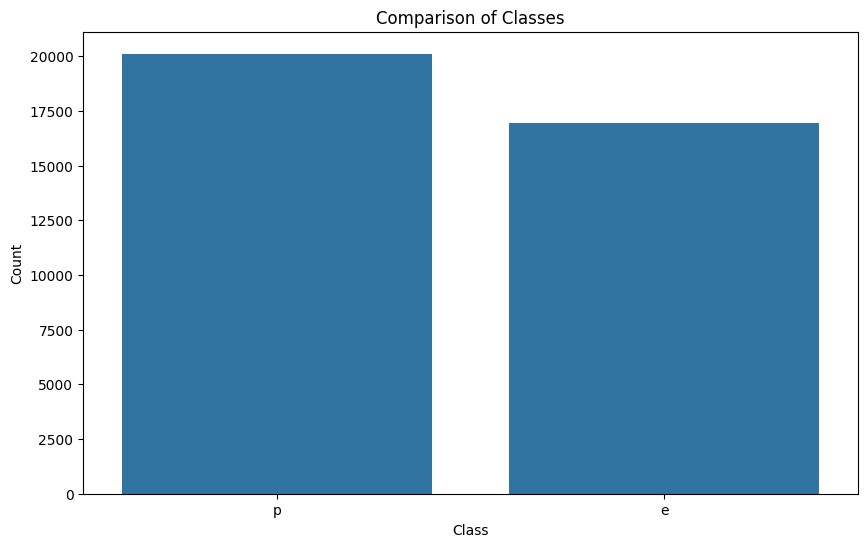

class
p    20121
e    16944
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data = pre_x)
plt.title('Comparison of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print(f"{pre_x['class'].value_counts()}")

In [ ]:
class_p = pre_x[pre_x['class'] == 'p']
class_e = pre_x[pre_x['class'] == 'e']

don_sam = class_p.sample(n=len(class_e), random_state=42)
balanced_data = pd.concat([don_sam, class_e])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

shape_of_dataframe = balanced_data.shape

print("Shape of the DataFrame:", shape_of_dataframe)

Shape of the DataFrame: (33888, 13)


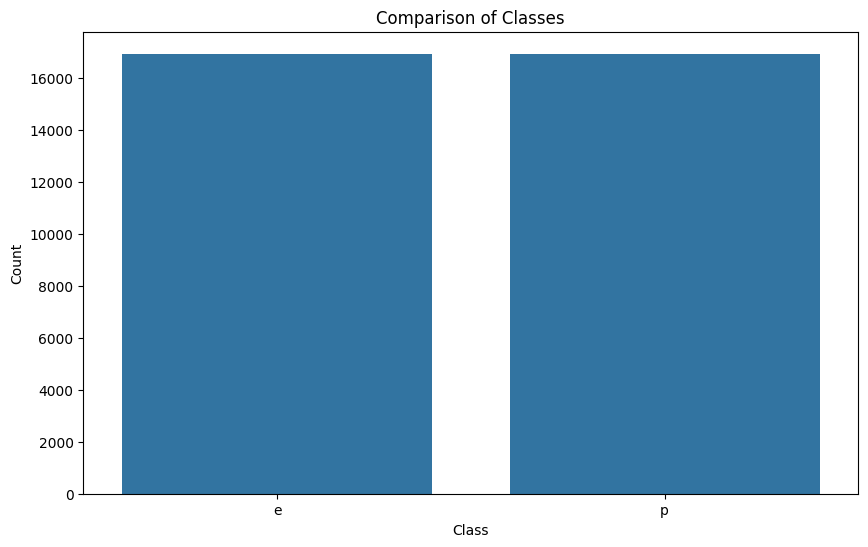

class
e    16944
p    16944
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data = balanced_data)
plt.title('Comparison of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print(f"{balanced_data['class'].value_counts()}")

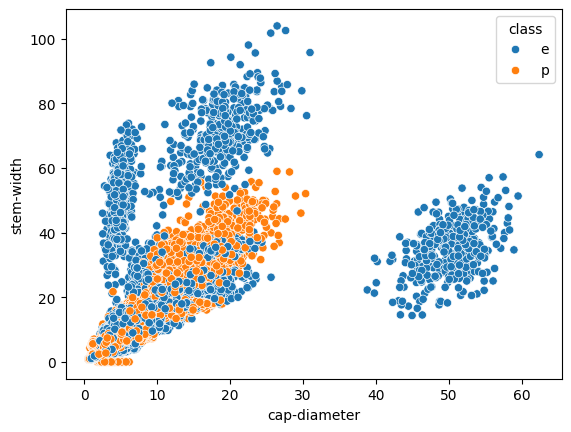

In [ ]:
sns.scatterplot(x = balanced_data["cap-diameter"], y = balanced_data["stem-width"], hue = balanced_data["class"])
plt.show()

In [ ]:
balanced_data.nunique()

class                 2
cap-diameter       2512
cap-shape             7
cap-surface          11
cap-color            12
gill-attachment       7
gill-color           12
stem-height        1912
stem-width         4455
stem-color           12
has-ring              2
ring-type             7
season                4
dtype: int64

In [ ]:
balanced_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,season
0,e,9.86,x,s,n,p,n,6.44,16.58,n,t,p,u
1,e,5.08,f,y,n,s,g,4.26,7.42,w,f,f,a
2,p,3.18,f,w,o,d,y,2.72,5.88,n,f,f,u
3,e,7.29,x,y,n,e,w,7.11,10.89,n,f,f,u
4,p,3.72,f,t,n,x,p,6.14,4.40,g,f,f,u


In [ ]:
print(f"number of Headings: {len(balanced_data.columns)}")
for inx,dat in enumerate(balanced_data.nunique()): print (inx,dat)

number of Headings: 13
0 2
1 2512
2 7
3 11
4 12
5 7
6 12
7 1912
8 4455
9 12
10 2
11 7
12 4


In [ ]:
# Columns to apply one-hot encoding
columns_to_one_hot_encode = balanced_data.columns[[2, 3, 4, 5, 6, 9, 10, 11, 12]].tolist()

# Apply one-hot encoding to the specified columns
balanced_data_0 = pd.get_dummies(balanced_data, columns=columns_to_one_hot_encode)

final_data = balanced_data_0

In [ ]:
final_data.shape


(33888, 78)

In [ ]:
final_data.head()

,class,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,ring-type_f,ring-type_g,ring-type_l,ring-type_p,ring-type_r,ring-type_z,season_a,season_s,season_u,season_w
0,e,9.86,6.44,16.58,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,e,5.08,4.26,7.42,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,p,3.18,2.72,5.88,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,e,7.29,7.11,10.89,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,p,3.72,6.14,4.40,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
x=final_data.drop("class",axis=1)
y=final_data["class"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25416, 77)
(8472, 77)
(25416,)
(8472,)


In [ ]:
warnings.filterwarnings(action='ignore', category=FutureWarning,message="`max_features='auto'` has been deprecated")
param_grid = {'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.1, .01, .001], 'max_depth' : list(range(25, 36)), 'criterion' :['gini', 'entropy']}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=10, verbose= 3)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 198 candidates, totalling 1980 fits
[CV 1/10] END ccp_alpha=0.1, criterion=gini, max_depth=25, max_features=auto;, score=0.500 total time=   0.2s
[CV 2/10] END ccp_alpha=0.1, criterion=gini, max_depth=25, max_features=auto;, score=0.500 total time=   0.2s
[CV 3/10] END ccp_alpha=0.1, criterion=gini, max_depth=25, max_features=auto;, score=0.500 total time=   0.2s
[CV 4/10] END ccp_alpha=0.1, criterion=gini, max_depth=25, max_features=auto;, score=0.500 total time=   0.4s
[CV 5/10] END ccp_alpha=0.1, criterion=gini, max_depth=25, max_features=auto;, score=0.500 total time=   0.2s
[CV 6/10] END ccp_alpha=0.1, criterion=gini, max_depth=25, max_features=auto;, score=0.500 total time=   0.2s
[CV 7/10] END ccp_alpha=0.1, criterion=gini, max_depth=25, max_features=auto;, score=0.500 total time=   0.3s
[CV 8/10] END ccp_alpha=0.1, criterion=gini, max_depth=25, max_features=auto;, score=0.500 total time=   0.2s
[CV 9/10] END ccp_alpha=0.1, criterion=gini, max_depth=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                                       35],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [ ]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=33,
                       max_features='sqrt')

In [ ]:
final_model.fit(x_train, y_train)
y_predict = final_model.predict(x_test)
fg = classification_report(y_test, y_predict)
print("DecisionTreeClassifier:\n", fg)

DecisionTreeClassifier:
               precision    recall  f1-score   support

           e       0.98      0.98      0.98      4231
           p       0.98      0.98      0.98      4241

    accuracy                           0.98      8472
   macro avg       0.98      0.98      0.98      8472
weighted avg       0.98      0.98      0.98      8472



In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

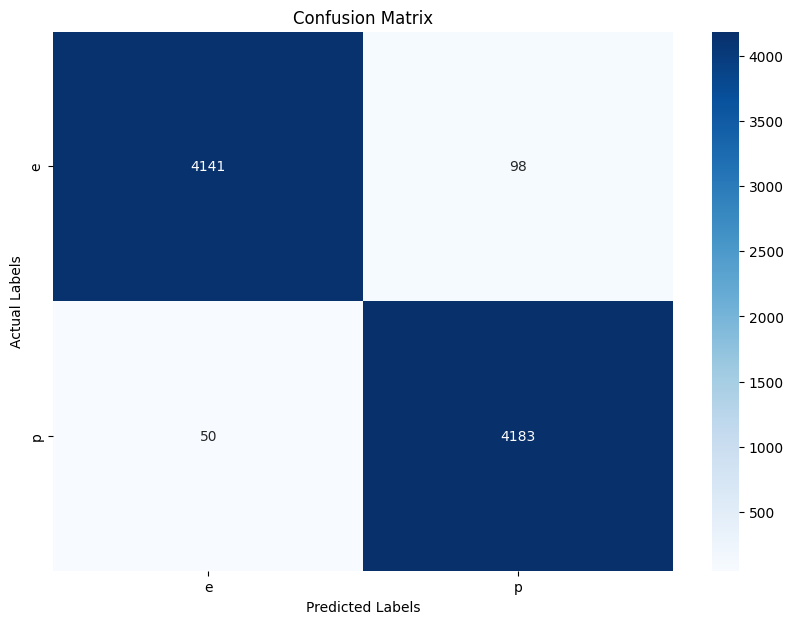

In [ ]:
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()